# Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

df = pd.read_csv('dataset.csv')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Constante

In [2]:
CATEGORICAL = ['Month', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
NUMERICAL = list(set(df.columns) - set(CATEGORICAL))

COLUMN_TYPE = ['c' if col in CATEGORICAL else 'n' for col in df.columns]

CAT_ATTR = list(map(lambda x : list(df.columns).index(x), CATEGORICAL))
NUM_ATTR = list(map(lambda x : list(df.columns).index(x), NUMERICAL))

# Date categorice

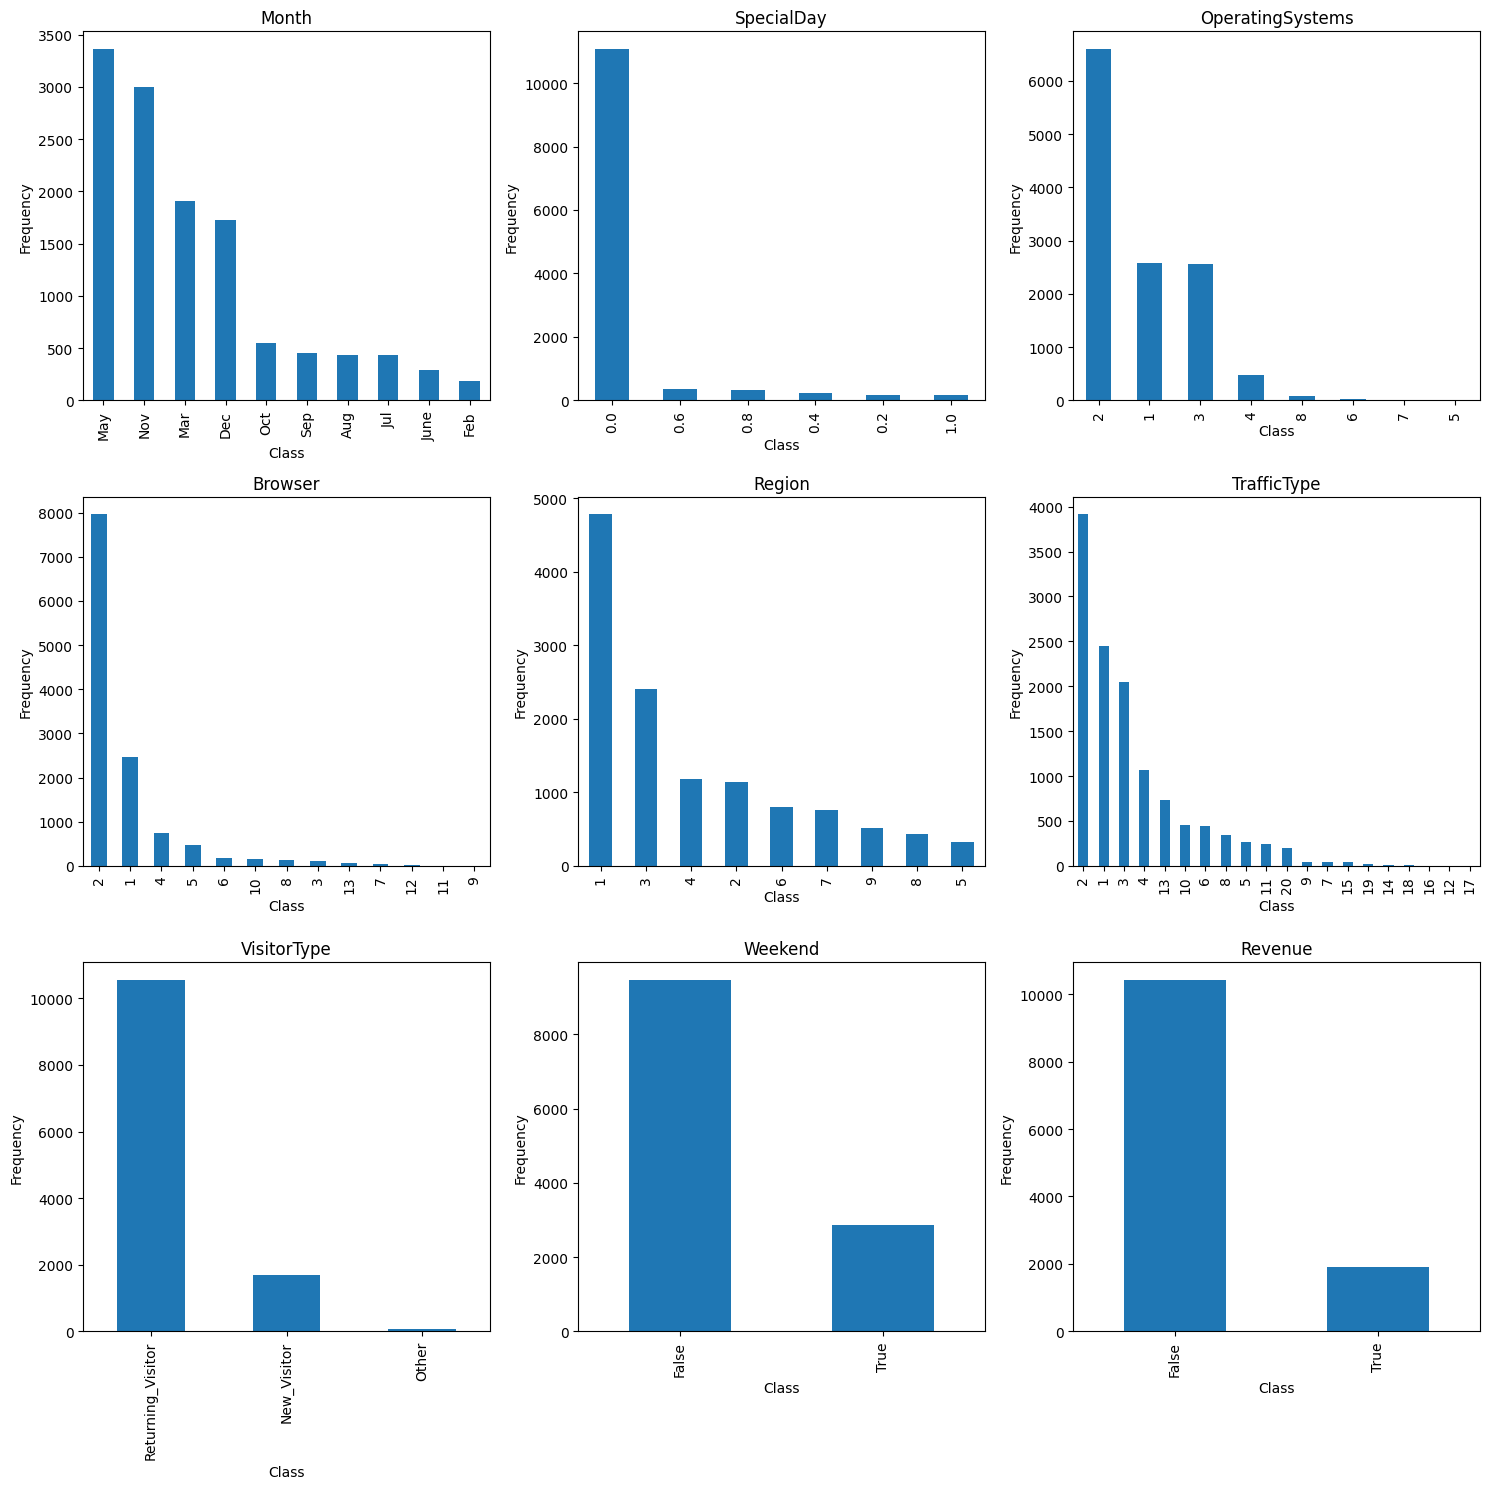

In [3]:
'''
3.1.1
'''
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for ax, category in zip(axes.flatten(), CATEGORICAL):
    class_counts = df[category].value_counts()
    class_counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('Class')
    ax.set_ylabel('Frequency')
    ax.set_title(category)

plt.tight_layout()
plt.show()

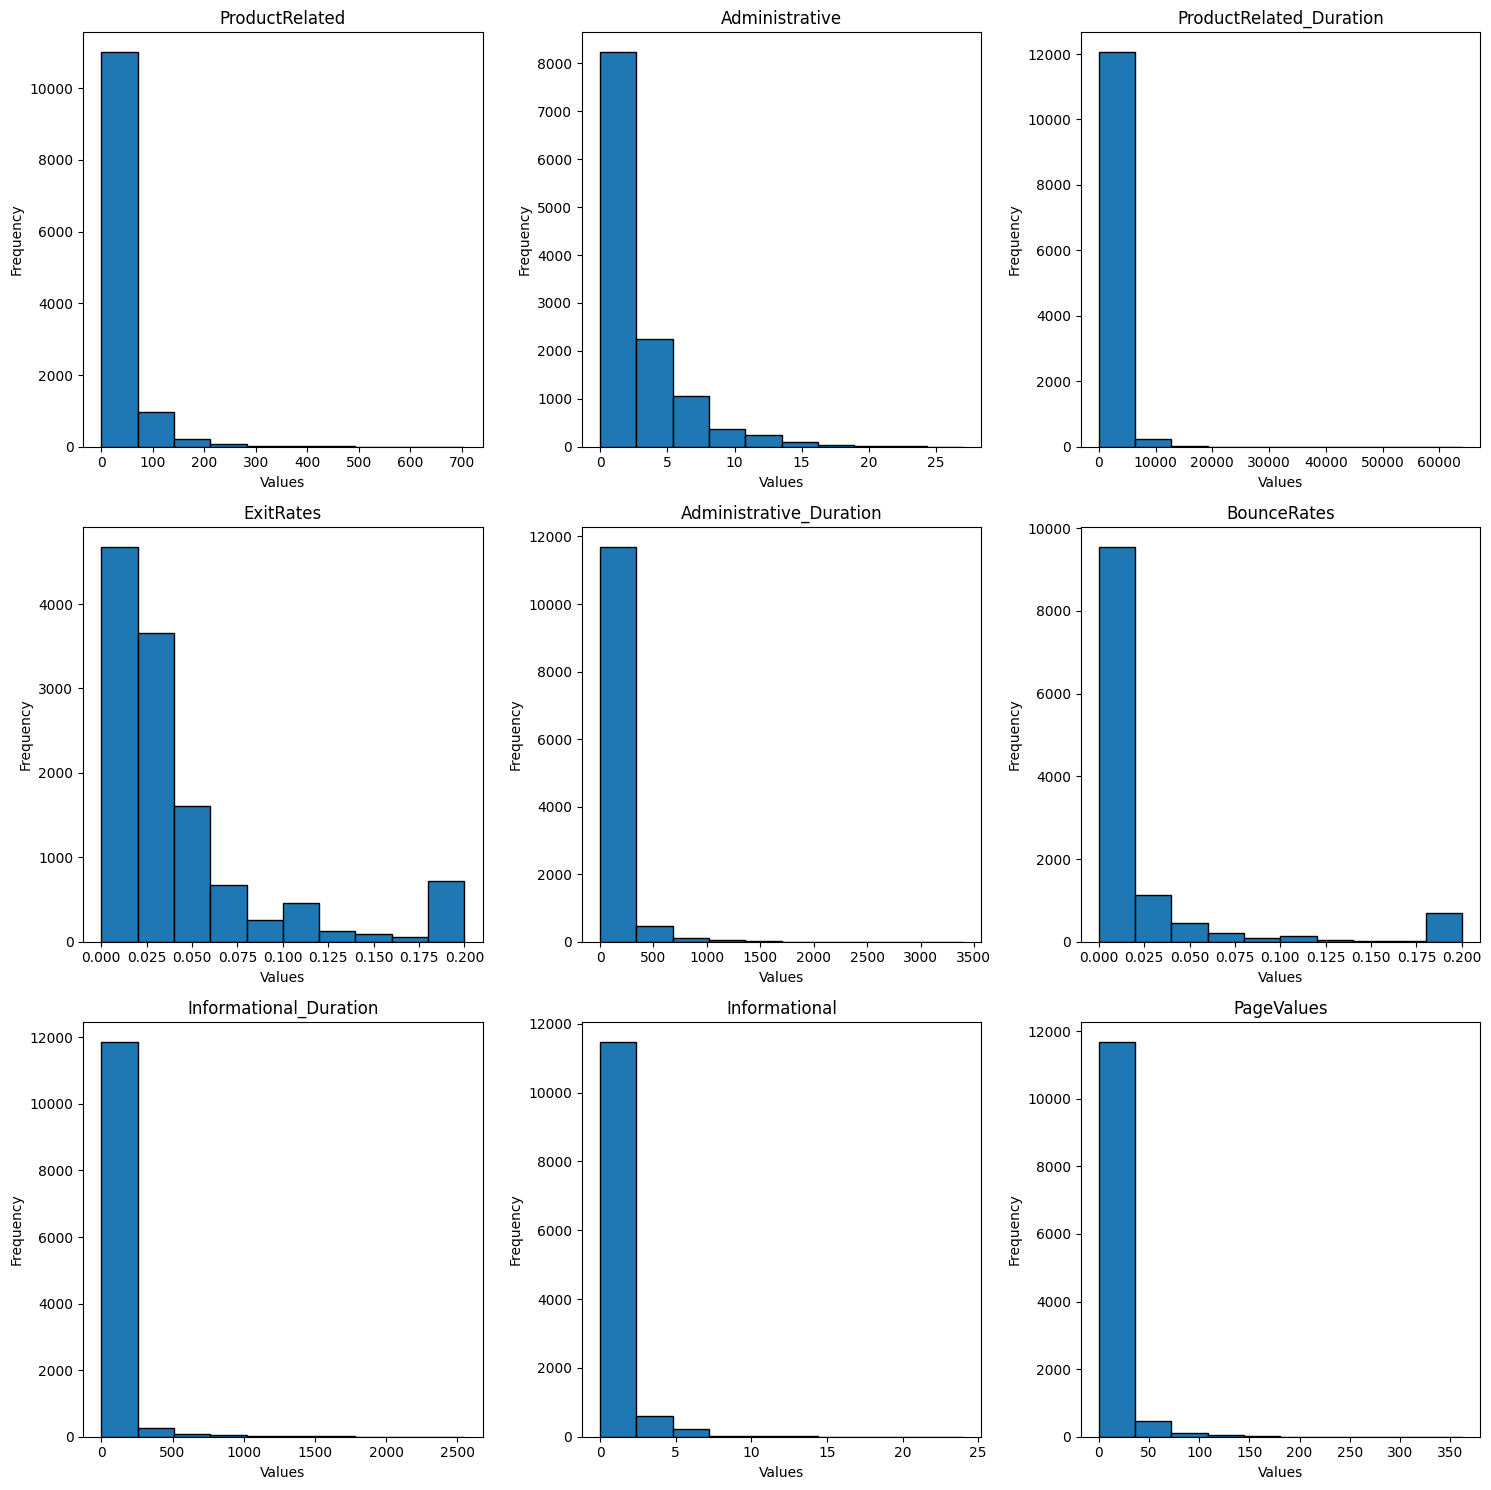

In [4]:
'''
3.1.2 - A
'''

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for ax, col in zip(axes.flatten(), NUMERICAL):
    column_values = df[col]
    min_value = column_values.min()
    max_value = column_values.max()
    bins = [min_value + (max_value - min_value) * i / 10 for i in range(11)]
    ax.hist(column_values, bins=bins, edgecolor='black')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [5]:
'''
3.1.2 - B
'''

TARGET = 'Revenue'
target_values = df[TARGET]

r_values = []
p_values = []

for col in NUMERICAL:
    column_values = df[col]
    r, p = stats.pointbiserialr(column_values, target_values)
    r_values.append(r)
    p_values.append(p)

df_pbc = pd.DataFrame({'column' : NUMERICAL, 'r-value' : r_values, 'p-value' : p_values})
df_pbc

,column,r-value,p-value
0,ProductRelated,0.158538,3.241187e-70
1,Administrative,0.138917,3.519760e-54
2,ProductRelated_Duration,0.152373,6.115338e-65
3,ExitRates,-0.207071,1.662654e-119
4,Administrative_Duration,0.093587,2.146514e-25
5,BounceRates,-0.150673,1.594198e-63
6,Informational_Duration,0.070345,5.282871e-15
7,Informational,0.095200,3.174034e-26
8,PageValues,0.492569,0.000000e+00


<BarContainer object of 9 artists>

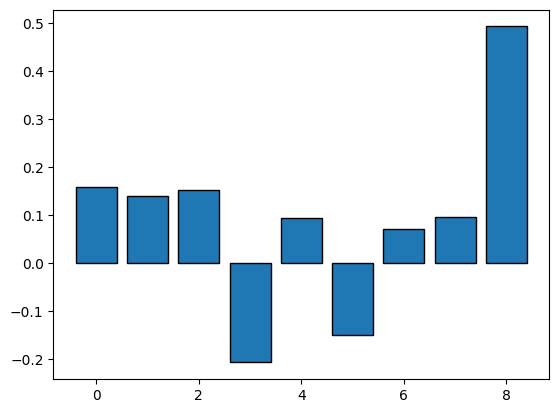

In [6]:
plt.bar(list(range(len(r_values))), r_values, edgecolor='black')

In [7]:
r_values = []
p_values = []

#target_values = pd.Categorical(target_values).codes

categories = list(set(CATEGORICAL) - set([TARGET]))

for col in categories:
    column_values = df[col]
    info = pd.crosstab(column_values, target_values)
    r, p, _, _ = stats.chi2_contingency(info)
    r_values.append(r)
    p_values.append(p)

df_chi2 = pd.DataFrame({'column' : categories, 'r-value' : r_values, 'p-value' : p_values})
df_chi2

,column,r-value,p-value
0,Browser,27.715299,6.087543e-03
1,Month,384.934762,2.238786e-77
2,TrafficType,373.145565,1.652735e-67
3,Region,9.252751,3.214250e-01
4,VisitorType,135.251923,4.269904e-30
5,SpecialDay,96.076906,3.543244e-19
6,OperatingSystems,75.027056,1.416094e-13
7,Weekend,10.390978,1.266325e-03


<BarContainer object of 8 artists>

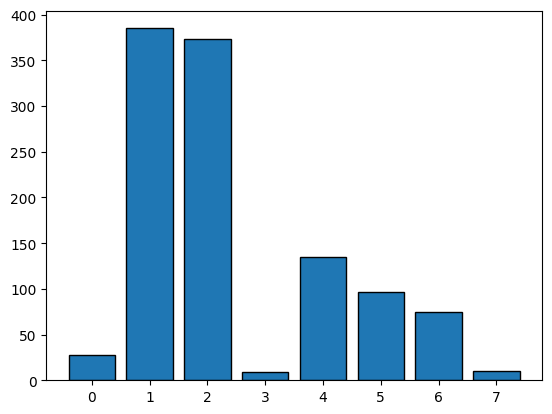

In [8]:
plt.bar(list(range(len(r_values))), r_values, edgecolor='black')

# Implementare Regresie Logistica

In [3]:
'''
3.2 - Logistic Regression Implementation
'''

def logistic(x):
    return 1 / (1 + np.exp(-x))

def nll(Y, T):
    return -sum(list(map(lambda p : p[0] * np.log(p[1]) + (1 - p[0]) * np.log(1-p[1]), zip(T, Y))))

def accuracy(Y, T):
    return (Y.size - sum(list(map(lambda p : np.abs(p[0] - p[1]), zip(Y, T))))) / Y.size

class MyLogisticRegression():
    
    def __init__(self):
        self.W = None

    def fit(self, X, T, lr=.01, epochs_no=100):
        X, T = np.array(X), np.array(T)
        (N, D) = X.shape
        X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
        self.W = np.random.randn((D+1))

        for _ in range(epochs_no):
            self.W = self.W - lr * np.transpose(X_hat) @ (logistic(X_hat @ self.W) - T)

    def predict(self, X):
        X = np.array(X)
        (N, _) = X.shape
        X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
        return logistic(X_hat @ self.W)



# Implementare Arbori de Decizie

In [4]:
'''
3.2 - Decision Tree Implementation
'''

from collections import Counter
import random
import math
from math import log2

class Node:
    """ Representation for a node from the decision tree """
    def __init__(self, label, leaf=False):
        """
            for non-leafs it is the name of the attribute
            for leafs it is the class
        """
        self.label = label
        self.leaf = leaf
        
        # Dictionary of (attribute value, nodes)
        self.children = {}
    
    def display(self, indent = ""):
        print(indent + (str(self.label) + ":" if self.children else "<" + str(self.label) + ">"))
        indent += "   "
        if self.children:
            for key, value in self.children.items():
                print(indent + ":" + str(key))
                value.display(indent + "   ")

def mostFrequentClass(T):
    mf, _ = max(dict(Counter(T)).items(), key=lambda x : x[1])
    return mf

def entropy(T):
    val_classes = dict(Counter(T)).items()
    
    total_count = len(T)
    
    return -sum(list(map(lambda x : (x[1] / total_count) * log2(x[1] / total_count), val_classes)))

'''
a in range 0 to len(X[0]) (num columns)
'''
def gain(X, T, a):
    attr_vals = [row[a] for row in X]
    values = dict(Counter(attr_vals)).items()
    
    return entropy(T) - sum(list(map(lambda x : (x[1] / len(X)) * entropy([t for (y, t) in zip(X, T) if y[a] == x[0]]), values)))

'''
a, threshold - index of column
X, T - sorted
'''
def gain_split(T, threshold):
    T1 = T[:(threshold + 1)]
    T2 = T[(threshold + 1):]
    
    return entropy(T) - (len(T1) / len(T)) * entropy(T1) - (len(T2) / len(T)) * entropy(T2)

'''
(gain, threshold)
'''
def max_gain_split(X, T, a):
    P = sorted(zip(X, T), key=lambda x : x[0][a])
    T_sorted = list(map(lambda x : x[1], P))
    
    #gains = list(map(lambda x : (gain_split(T_sorted, x), x), range(len(T_sorted) - 1)))
    gains = []
    for threshold in range(len(T_sorted) - 1):
        if T_sorted[threshold] != T_sorted[threshold + 1]:
            gains.append((gain_split(T_sorted, threshold=threshold), threshold))
    if gains == []:
        return 0, 'pure'
    return max(gains, key=lambda x : x[0])

def build_tree(X, T, A, d = 6):
    # print('T: ', T)
    # print([df.columns[a] for a in A])
    if d == 0:
        return Node(mostFrequentClass(T), leaf=True)
    
    A_cat = [a for a in A if a in CAT_ATTR]
    A_num = [a for a in A if a in NUM_ATTR]
    
    gains = list(map(lambda a : (a, gain(X, T, a), 'c'), A_cat)) + list(map(lambda a : (a, *max_gain_split(X, T, a)), A_num))
    a, g, threshold = max(gains, key=lambda x : x[1])
    
    if a in CAT_ATTR:
        attr_vals = [row[a] for row in X]
        values = dict(Counter(attr_vals)).keys()
        # for val in values:
        #     print('Tags for value "' + str(val) + '": ', [t for (y, t) in zip(X, T) if y[a] == val])
        
        trees = Node(a)
        trees.children = dict(map(lambda x : (x, build_tree([y for y in X if y[a] == x], [t for (y, t) in zip(X, T) if y[a] == x], [a_new for a_new in A if a_new != a], d - 1)), values))
        return trees
    
    if threshold == 'pure':
        return Node(T[0], leaf=True)
    
    P = sorted(zip(X, T), key=lambda x : x[0][a])
    X_sorted = list(map(lambda x : x[0], P))
    T_sorted = list(map(lambda x : x[1], P))
    
    X1, T1 = X_sorted[:(threshold + 1)], T_sorted[:(threshold + 1)]
    X2, T2 = X_sorted[(threshold + 1):], T_sorted[(threshold + 1):]
    
    trees = Node(a)
    trees.children = {'<' + str(X_sorted[threshold][a]) : build_tree(X1, T1, A, d - 1),
                      '>' + str(X_sorted[threshold][a]) : build_tree(X2, T2, A, d - 1)}
    
    return trees

def evaluate_tree(tree, x):
    #print(tree.label, value, tree.leaf)
    if tree.leaf:
        return tree.label
    
    value = x[tree.label]
    if tree.label in NUM_ATTR:
        for key, node in tree.children.items():
            if key[0] == '<':
                compare = float(key[1:])
                #print('compare<: ', compare)
                if value <= compare:
                    return evaluate_tree(node, x)
            if key[0] == '>':
                compare = float(key[1:])
                #print('compare>: ', compare)
                if value > compare:
                    return evaluate_tree(node, x)
    
    info = sorted(tree.children.items(), key=lambda x : x[0])
    
    if value > info[-1][0]:
        return evaluate_tree(info[-1][1], x)
    
    for key, node in info:
        if value <= key:
            return evaluate_tree(node, x)

class MyDecisionTree():
    
    def __init__(self, max_depth=6):
        self.tree = None
        self.d = max_depth
        
    def fit(self, X, T):
        self.tree = build_tree(X, T, list(range(len(X[0]))), self.d)
    
    def predict(self, X):
        return list(map(lambda x : evaluate_tree(self.tree, x), X))

# Codificare variabile categorice

In [5]:
from sklearn.calibration import LabelEncoder
import copy

label_encoder = LabelEncoder()
df_encoded = copy.deepcopy(df)

for col in CATEGORICAL:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

## Antrenare modele pe o impartire train/test

In [6]:
'''
Training implemented Decision Tree Classifier
'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df.columns)

X, T = df_scaled.iloc[:, :-1].values.tolist(), df_scaled.iloc[:, -1].values.tolist()

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)

model = MyDecisionTree(max_depth=3)

model.fit(X_train, T_train)

In [7]:
'''
Evaluation implemented Decision Tree Classifier
'''
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy_score(T_test, predictions)

0.8921330089213301

In [8]:
'''
Training implemented Logistic Regression Model
'''
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df.columns)

X, T = df_scaled.iloc[:, :-1].values.tolist(), df_scaled.iloc[:, -1].values.tolist()

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)

model = MyLogisticRegression()

model.fit(X_train, T_train)
binary_predictions = (model.predict(X_test) >= 0.5).astype(int)

correctly_classified = np.sum(binary_predictions == T_test)
correctly_classified / len(T_test)

0.8381995133819952

In [9]:
'''
Training Logistic Regression Model using scikit
'''

from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df.columns)

X, T = df_scaled.iloc[:, :-1].values.tolist(), df_scaled.iloc[:, -1].values.tolist()

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, T_train)

binary_predictions = (model.predict(X_test) >= 0.5).astype(int)

correctly_classified = np.sum(binary_predictions == T_test)
correctly_classified / len(T_test)

0.8751013787510138

In [10]:
'''
Training Decision Tree Classifier using scikit
'''

from sklearn.tree import DecisionTreeClassifier

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df.columns)

X, T = df_scaled.iloc[:, :-1].values.tolist(), df_scaled.iloc[:, -1].values.tolist()

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)

model = DecisionTreeClassifier()

model.fit(X_train, T_train)

predictions = model.predict(X_test)
accuracy_score(T_test, predictions)

0.8661800486618005

# Testare modele + Rezultate

In [16]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import statistics

def test_one(model_name, scaler_name, depth=None):
    if scaler_name == 'No Scaling':
        df_scaled = copy.deepcopy(df_encoded)
    else:
        df_scaled = df_encoded.iloc[:, :(len(df.columns) - 1)]
        
        if scaler_name == 'MinMax':
            scaler = MinMaxScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
        elif scaler_name == 'StandardMinMax':
            scaler = StandardScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
            
            scaler = MinMaxScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
        elif scaler_name == 'StandardRobustMinMax':
            scaler = StandardScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
            
            scaler = RobustScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
            
            scaler = MinMaxScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
        elif scaler_name == 'RobustMinMax':
            scaler = RobustScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
            
            scaler = MinMaxScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
        elif scaler_name == 'RobustStandardMinMax':
            scaler = RobustScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
            
            scaler = StandardScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
            
            scaler = MinMaxScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
        
        df_scaled = pd.concat([df_scaled, df_encoded['Revenue']], axis=1)
    
    if model_name == 'LogisticRegression':
        model = LogisticRegression()
    elif model_name == 'MyLogisticRegression':
        model = MyLogisticRegression()
    elif model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(max_depth=depth)
    elif model_name == 'MyDecisionTree':
        model = MyDecisionTree(max_depth=depth)
    
    X, T = df_scaled.iloc[:, :-1].values.tolist(), df_scaled.iloc[:, -1].values.tolist()

    X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)
    
    model.fit(X_train, T_train)
    predictions = model.predict(X_test)
    predictions = (np.array(predictions) >= 0.5).astype(int)
    
    return accuracy_score(T_test, predictions), precision_score(T_test, predictions, zero_division=np.nan), recall_score(T_test, predictions), f1_score(T_test, predictions)

def test(tests, model_name, scaler_name, depth=None):
    accs = []
    ps = []
    recs = []
    f1s = []
    for test in range(tests):
        a, p, r, f1 = test_one(model_name, scaler_name, depth)
        accs.append(a)
        ps.append(p)
        recs.append(r)
        f1s.append(f1)
        
        if model_name == 'MyDecisionTree':
            print('Test number ', test)
    return (np.nanmean(np.array(accs)), np.nanstd(np.array(accs)),
            np.nanmean(np.array(ps)), np.nanstd(np.array(ps)),
            np.nanmean(np.array(recs)), np.nanstd(np.array(recs)),
            np.nanmean(np.array(f1s)), np.nanstd(np.array(f1s)))
    
def test_all(tests):
    models_names = ['LogisticRegression', 'MyLogisticRegression', 'DecisionTreeClassifier', 'MyDecisionTree']
    # 'DecisionTreeClassifier', 'MyDecisionTree'
    scalers_names = ['MinMax', 'StandardMinMax', 'StandardRobustMinMax', 'RobustMinMax', 'RobustStandardMinMax']
    
    depths = [3, 4, 5, 6]
    
    table_models = []
    table_scalers = []
    depth = []
    accuracy = []
    accuracy_variance = []
    precision = []
    precision_variance = []
    recall = []
    recall_variance = []
    f1 = []
    f1_variance = []
    
    for model_name in models_names:
        if model_name == 'DecisionTreeClassifier':
            scalers_names.append('No Scaling')
        if model_name == 'MyDecisionTree' or model_name == 'DecisionTreeClassifier':
            for scaler_name in scalers_names:
                for d in depths:
                    table_models.append(model_name)
                    table_scalers.append(scaler_name)
                    depth.append(str(d))
                    
                    print(model_name, scaler_name, '; Depth: ', d)
                    a, av, p, pv, r, rv, f, fv = test(tests, model_name, scaler_name, depth=d)
                    
                    accuracy.append(a)
                    accuracy_variance.append(av)
                    precision.append(p)
                    precision_variance.append(pv)
                    recall.append(r)
                    recall_variance.append(rv)
                    f1.append(f)
                    f1_variance.append(fv)
        else:
            for scaler_name in scalers_names:
                table_models.append(model_name)
                table_scalers.append(scaler_name)
                depth.append('-')
                
                print(model_name, scaler_name)
                a, av, p, pv, r, rv, f, fv = test(tests, model_name, scaler_name)
                
                accuracy.append(a)
                accuracy_variance.append(av)
                precision.append(p)
                precision_variance.append(pv)
                recall.append(r)
                recall_variance.append(rv)
                f1.append(f)
                f1_variance.append(fv)
    
    df_results = pd.DataFrame({'Model' : table_models, 'Scaler' : table_scalers, 'Depth' : depth,
                               'Accuracy' : accuracy, 'Accuracy Variance' : accuracy_variance,
                               'Precision' : precision, 'Precision Variance' : precision_variance,
                               'Recall' : recall, 'Recall Variance' : recall_variance,
                               'F1' : f1, 'F1 Variance' : f1_variance})
    
    return df_results

In [17]:
df_results = test_all(10)
df_results

MyLogisticRegression MinMax
MyLogisticRegression StandardMinMax
MyLogisticRegression StandardRobustMinMax
MyLogisticRegression RobustMinMax
MyLogisticRegression RobustStandardMinMax


,Model,Scaler,Depth,Accuracy,Accuracy Variance,Precision,Precision Variance,Recall,Recall Variance,F1,F1 Variance
0,MyLogisticRegression,MinMax,-,0.838443,0.035970,0.833065,0.233990,0.092907,0.223712,0.078397,0.143015
1,MyLogisticRegression,StandardMinMax,-,0.763909,0.172425,0.637946,0.288593,0.208728,0.366300,0.109552,0.138694
2,MyLogisticRegression,StandardRobustMinMax,-,0.841484,0.013391,0.782382,0.267978,0.043301,0.122900,0.045385,0.122295
3,MyLogisticRegression,RobustMinMax,-,0.792863,0.152179,0.809614,0.261477,0.108443,0.290690,0.052432,0.092572
4,MyLogisticRegression,RobustStandardMinMax,-,0.781792,0.160814,0.818012,0.289870,0.194735,0.339495,0.117452,0.148365


### Salvare rezultate

In [27]:
df_results.to_csv('results.csv')

## Incarcare rezultate

In [27]:
import pandas as pd

df_results = pd.read_csv('results.csv')
df_results = df_results.drop('Unnamed: 0', axis=1)
df_results

,Model,Scaler,Depth,Accuracy,Accuracy Variance,Precision,Precision Variance,Recall,Recall Variance,F1,F1 Variance
0,LogisticRegression,MinMax,-,0.873479,0.000062,0.772764,0.000991,0.272053,0.000635,0.401965,0.000885
1,LogisticRegression,StandardMinMax,-,0.876521,0.000021,0.769559,0.000992,0.274805,0.000495,0.404649,0.000707
2,LogisticRegression,StandardRobustMinMax,-,0.874696,0.000023,0.767926,0.001643,0.270349,0.000273,0.399508,0.000376
3,LogisticRegression,RobustMinMax,-,0.874250,0.000014,0.757808,0.000305,0.270110,0.000266,0.397926,0.000311
4,LogisticRegression,RobustStandardMinMax,-,0.872668,0.000009,0.768366,0.000442,0.261658,0.000378,0.390059,0.000507
5,MyLogisticRegression,MinMax,-,0.827048,0.004041,0.744980,0.224244,0.092704,0.064853,0.062128,0.016728
6,MyLogisticRegression,StandardMinMax,-,0.721006,0.041594,0.786159,0.243027,0.366966,0.201428,0.185774,0.037167
7,MyLogisticRegression,StandardRobustMinMax,-,0.808110,0.006087,0.584132,0.052232,0.274018,0.104975,0.223350,0.040406
8,MyLogisticRegression,RobustMinMax,-,0.765531,0.030912,0.809614,0.261477,0.203566,0.163926,0.086558,0.019527
9,MyLogisticRegression,RobustStandardMinMax,-,0.764964,0.025295,0.818012,0.289870,0.304106,0.164908,0.173238,0.038579


In [28]:
def make_bold(s):
    return ['font-weight: bold' for i in range(len(s))]

df_results = df_results.style.apply(make_bold, subset=pd.IndexSlice[18, :])
df_results

,Model,Scaler,Depth,Accuracy,Accuracy Variance,Precision,Precision Variance,Recall,Recall Variance,F1,F1 Variance
0,LogisticRegression,MinMax,-,0.873479,0.000062,0.772764,0.000991,0.272053,0.000635,0.401965,0.000885
1,LogisticRegression,StandardMinMax,-,0.876521,0.000021,0.769559,0.000992,0.274805,0.000495,0.404649,0.000707
2,LogisticRegression,StandardRobustMinMax,-,0.874696,0.000023,0.767926,0.001643,0.270349,0.000273,0.399508,0.000376
3,LogisticRegression,RobustMinMax,-,0.874250,0.000014,0.757808,0.000305,0.270110,0.000266,0.397926,0.000311
4,LogisticRegression,RobustStandardMinMax,-,0.872668,0.000009,0.768366,0.000442,0.261658,0.000378,0.390059,0.000507
5,MyLogisticRegression,MinMax,-,0.827048,0.004041,0.744980,0.224244,0.092704,0.064853,0.062128,0.016728
6,MyLogisticRegression,StandardMinMax,-,0.721006,0.041594,0.786159,0.243027,0.366966,0.201428,0.185774,0.037167
7,MyLogisticRegression,StandardRobustMinMax,-,0.808110,0.006087,0.584132,0.052232,0.274018,0.104975,0.223350,0.040406
8,MyLogisticRegression,RobustMinMax,-,0.765531,0.030912,0.809614,0.261477,0.203566,0.163926,0.086558,0.019527
9,MyLogisticRegression,RobustStandardMinMax,-,0.764964,0.025295,0.818012,0.289870,0.304106,0.164908,0.173238,0.038579
